In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
%matplotlib inline

In [4]:
class Data(Dataset):
    def __init__(self, train = True):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.f = -3 * self.x + 1
        self.y = -3 * self.x + 1 + 0.1 * torch.randn(self.x.size())
        self.len = self.x.shape[0]
        
        # Outliers
        if train:
            self.y[0] = 0
            self.y[50:55] = 20
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

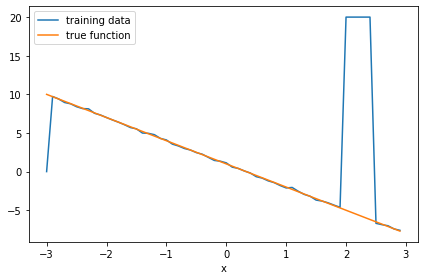

In [6]:
# Plot points
train_data = Data()
val_data = Data(train = False)

plt.plot(train_data.x.numpy(), train_data.y.numpy(), label='training data')
plt.plot(val_data.x.numpy(), val_data.f.numpy(), label='true function')
plt.xlabel('x')
plt.legend()
plt.tight_layout()
plt.show()

In [40]:
class linear_regression(nn.Module):
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        return self.linear(x)

In [41]:
criterion = nn.MSELoss()
trainloader = DataLoader(dataset=train_data, batch_size=1)

In [42]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]
train_error = torch.zeros(len(learning_rates))
val_error = torch.zeros(len(learning_rates))
MODELS = []

In [43]:
def train_model_lr(iter, lr_list, data_loader):
    for i, lr in zip(range(len(lr_list)), lr_list):
        model = linear_regression(1, 1)
        optimizer = optim.SGD(model.parameters(), lr = lr)
        for epoch in range(iter):
            for x, y in data_loader:
                y_hat = model(x)
                loss = criterion(y_hat, y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        # After training
        y_hat_ = model(train_data.x)
        train_loss = criterion(y_hat_, train_data.y)
        train_error[i] = train_loss.item()

        y_hat_ = model(val_data.x)
        val_loss = criterion(y_hat_, val_data.y)
        val_error[i] = val_loss.item()
        MODELS.append(model)
            
train_model_lr(10, learning_rates, trainloader)

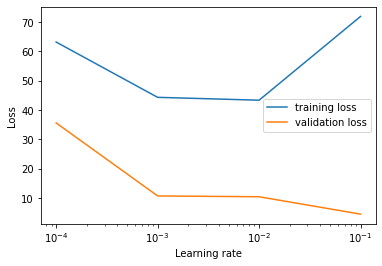

In [44]:
# Plot the training loss and validation loss
plt.semilogx(np.array(learning_rates), np.array(train_error), label='training loss')
plt.semilogx(np.array(learning_rates), np.array(val_error), label='validation loss')
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.legend()
plt.show()

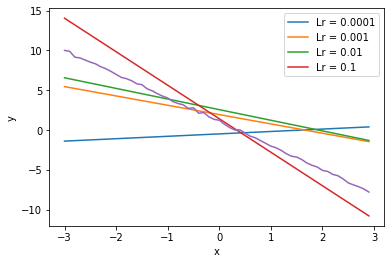

In [53]:
for model, learning_rate in zip(MODELS, learning_rates):
    y_hat = model(val_data.x)
    plt.plot(val_data.x.numpy(), y_hat.detach().numpy(), label=('Lr = ' + str(learning_rate)))
plt.plot(val_data.x.numpy(), val_data.y.numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [57]:
# Practice
good_model = MODELS[np.argmax(-val_error)]
trainloader = DataLoader(dataset=train_data)

for x, y in trainloader:
    print('y_hat =', good_model(x).detach().numpy(), 'y = ', y.numpy())
print('loss =', criterion(good_model(train_data.x), train_data.y).detach().numpy())

y_hat = [[14.041762]] y =  [[0.]]
y_hat = [[13.62078]] y =  [[9.719518]]
y_hat = [[13.199798]] y =  [[9.406466]]
y_hat = [[12.778816]] y =  [[8.946571]]
y_hat = [[12.357834]] y =  [[8.777995]]
y_hat = [[11.936852]] y =  [[8.399765]]
y_hat = [[11.515871]] y =  [[8.1600275]]
y_hat = [[11.094889]] y =  [[8.127307]]
y_hat = [[10.673907]] y =  [[7.5502195]]
y_hat = [[10.252925]] y =  [[7.327427]]
y_hat = [[9.8319435]] y =  [[7.0001955]]
y_hat = [[9.410961]] y =  [[6.6876454]]
y_hat = [[8.98998]] y =  [[6.3976107]]
y_hat = [[8.568998]] y =  [[6.0695424]]
y_hat = [[8.148016]] y =  [[5.701608]]
y_hat = [[7.7270346]] y =  [[5.5392365]]
y_hat = [[7.306052]] y =  [[4.9913692]]
y_hat = [[6.8850703]] y =  [[4.953782]]
y_hat = [[6.464089]] y =  [[4.779602]]
y_hat = [[6.043107]] y =  [[4.2979794]]
y_hat = [[5.622125]] y =  [[4.0998535]]
y_hat = [[5.2011433]] y =  [[3.557541]]
y_hat = [[4.780162]] y =  [[3.3218298]]
y_hat = [[4.3591795]] y =  [[2.9952965]]
y_hat = [[3.9381979]] y =  [[2.798462]]
y_hat